<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2023</h1>
    <h3>Trabajo Practico</h3>
    <h5>Grupo 4</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Braian Drago <p>
        <p>Integrantes: Garnica Hernán - Scime Silvia
</div>

Importamos modulos a utilizar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

#!pip install statsmodels


####  Leemos los datos a trabajar


In [2]:
url= 'https://raw.githubusercontent.com/jiang-011/AST_G4/main/dataset/Consumo_TP.csv'
raw_csv_data = pd.read_csv(url, sep=',', decimal='.')
df_consumo=raw_csv_data.copy()

#### Breve resumen del dataset


In [3]:
print(df_consumo.columns)

df_consumo.Consumo.mean()

Index(['Fecha', 'Consumo'], dtype='object')


45.95726011089604

In [4]:
df_consumo.head(10)

,Fecha,Consumo
0,2023-06-05,46.488384
1,2023-05-23,46.161079
2,2023-05-22,45.449817
3,2023-05-20,43.725000
4,2023-05-19,44.884902
5,2023-05-18,46.485462
6,2023-05-17,46.089042
7,2023-05-16,45.802815
8,2023-05-15,45.871810
9,2023-05-13,44.398464


In [5]:
df_consumo.Fecha.describe()

count            757
unique           757
top       2023-06-05
freq               1
Name: Fecha, dtype: object

In [6]:
df_consumo.dtypes

Fecha       object
Consumo    float64
dtype: object

Adaptamos el dataset para trabajarlo segun sus series temporales

In [7]:
df_consumo.Fecha = pd.to_datetime(df_consumo.Fecha, dayfirst = True)

In [8]:
df_consumo.head()

,Fecha,Consumo
0,2023-06-05,46.488384
1,2023-05-23,46.161079
2,2023-05-22,45.449817
3,2023-05-20,43.725000
4,2023-05-19,44.884902


In [9]:
df_consumo.Fecha.describe()

count                     757
unique                    757
top       2023-06-05 00:00:00
freq                        1
first     2021-10-01 00:00:00
last      2023-10-31 00:00:00
Name: Fecha, dtype: object

In [10]:
df_consumo.dtypes

Fecha      datetime64[ns]
Consumo           float64
dtype: object

In [11]:
from skimpy import skim

In [12]:
skim(df_consumo)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 757    │ │ datetime64  │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name        ┃ NA   ┃ NA %    ┃ mean    ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100    ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Consumo            │    0 │       0 │      46 │    3.8 │    0 │    44 │    46 │    48 │      56 │      ▇▇  │  │
│ └────────────────────┴──────┴─────────┴─────────┴────────┴──────┴───────┴───────┴───────┴─────────┴──────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ Fecha                  │      0 │         0 │     2021-10-01      │     2023-10-31      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Se puede observar que hay al menos 1 día con consumo igual a 0. Se analizará esto.

In [13]:
df_consumo.iloc[df_consumo.Consumo.argmin()]

Fecha      2022-05-17 00:00:00
Consumo                    0.0
Name: 756, dtype: object

El día 2022-05-17 hubo paro de transporte y no hubo carga de combustible, es por este motivo qe retirar del dataset ya que no representa un valor real de consumo.

In [14]:
df_consumo = df_consumo.loc[df_consumo.Consumo>0]

Seteamos como index del dataset segun el dia

In [15]:
df_consumo.set_index("Fecha")

,Consumo
Fecha,
2023-06-05,46.488384
2023-05-23,46.161079
2023-05-22,45.449817
2023-05-20,43.725000
2023-05-19,44.884902
...,...
2022-08-14,42.019789
2022-07-24,39.265885
2023-01-22,46.220412


In [16]:
df_consumo.head()

,Fecha,Consumo
0,2023-06-05,46.488384
1,2023-05-23,46.161079
2,2023-05-22,45.449817
3,2023-05-20,43.725000
4,2023-05-19,44.884902


In [17]:
df_consumo.set_index("Fecha", inplace=True)
df_consumo.head()

,Consumo
Fecha,
2023-06-05,46.488384
2023-05-23,46.161079
2023-05-22,45.449817
2023-05-20,43.725000
2023-05-19,44.884902


#### Adaptamos el datset segun la frecuencia de la serie temporal dada, donde:

- h: por hora
- w: semanal
- d: diario
- m: mensual
- b: dias laborables



In [18]:
df_consumo=df_consumo.asfreq('d')
df_consumo

,Consumo
Fecha,
2021-10-01,45.201497
2021-10-02,39.899719
2021-10-03,39.705724
2021-10-04,45.777167
2021-10-05,46.147136
...,...
2023-10-27,46.582215
2023-10-28,46.426496
2023-10-29,45.175833


In [19]:
df_consumo=df_consumo.asfreq('d')
df_consumo.head()

,Consumo
Fecha,
2021-10-01,45.201497
2021-10-02,39.899719
2021-10-03,39.705724
2021-10-04,45.777167
2021-10-05,46.147136


In [20]:
df_consumo.isna()

,Consumo
Fecha,
2021-10-01,False
2021-10-02,False
2021-10-03,False
2021-10-04,False
2021-10-05,False
...,...
2023-10-27,False
2023-10-28,False
2023-10-29,False


In [21]:
df_consumo.isna().sum()

Consumo    5
dtype: int64

Visualizamos una vez mas el dataset, pero esta vez teniendo en cuenta la serie temporal

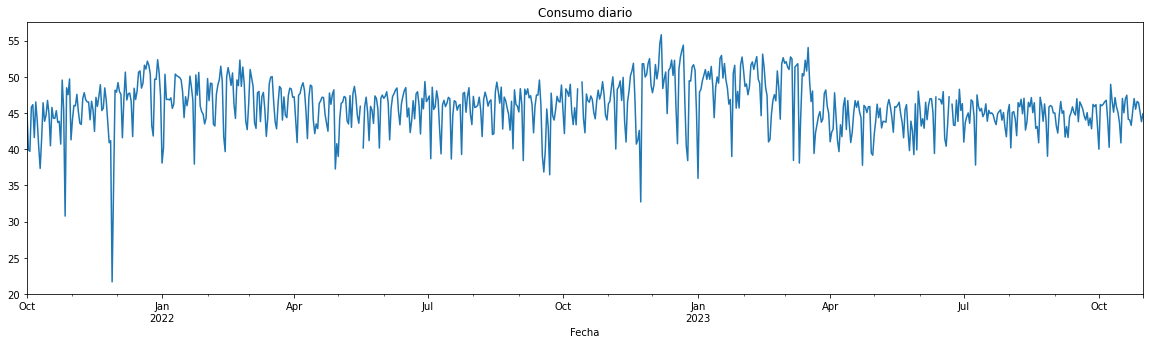

In [22]:
df_consumo.Consumo.plot(figsize=(20,5), title = "Consumo diario")
plt.show()

<AxesSubplot:ylabel='Consumo'>

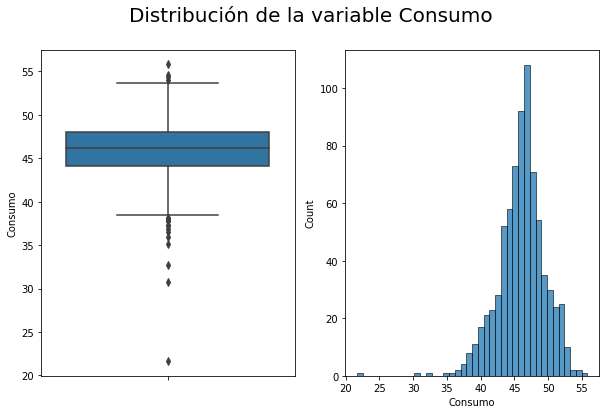

In [23]:
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10,6)
plt.suptitle('Distribución de la variable Consumo', fontsize = 20)


sns.histplot(data = df_consumo, x="Consumo", ax = axs[1])
sns.boxplot(y = "Consumo", data = df_consumo, ax = axs[0])


La variable consumo tiene una asimetría a la izquierda, habiendo días en donde el consumo fue muy bajo.

Descomposición de Series Temporales

In [24]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose

Descomposicion Aditiva

In [25]:
df_consumo=df_consumo.dropna()

In [26]:
df_consumo.isna().sum()

Consumo    0
dtype: int64

In [27]:
df_consumo = df_consumo.asfreq('d')
df_consumo = df_consumo.fillna(1)

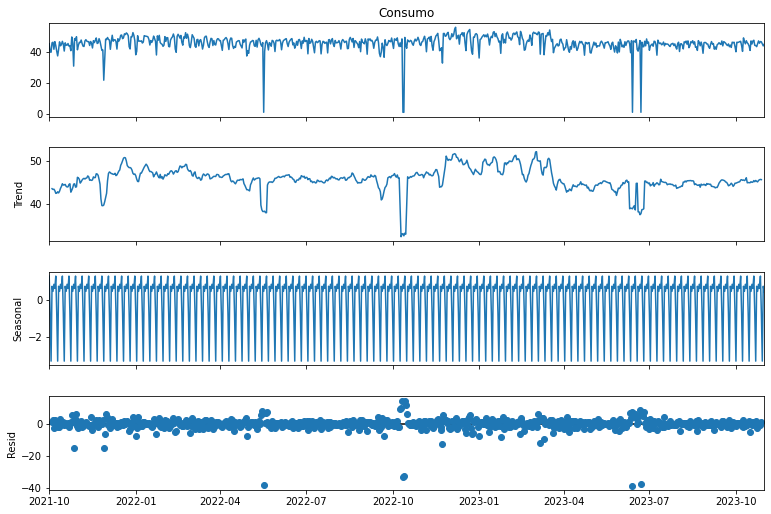

In [28]:
s_dec_additive = seasonal_decompose(df_consumo.Consumo, model = "adittive")
fig = s_dec_additive.plot()
fig.set_size_inches(12,8)
plt.show()

Se visualiza la tendencia de la serie.

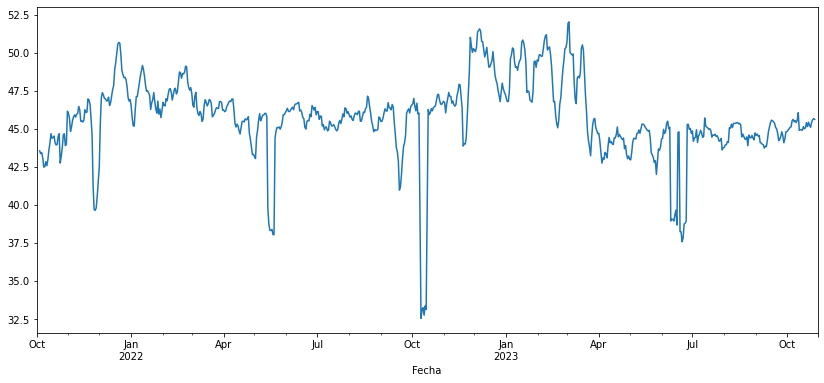

In [67]:
plt.figure( figsize = (14,6))
s:s_dec_additive.trend.plot()
plt.show()

La serie presenta estacionalidad, se verá a continuación.

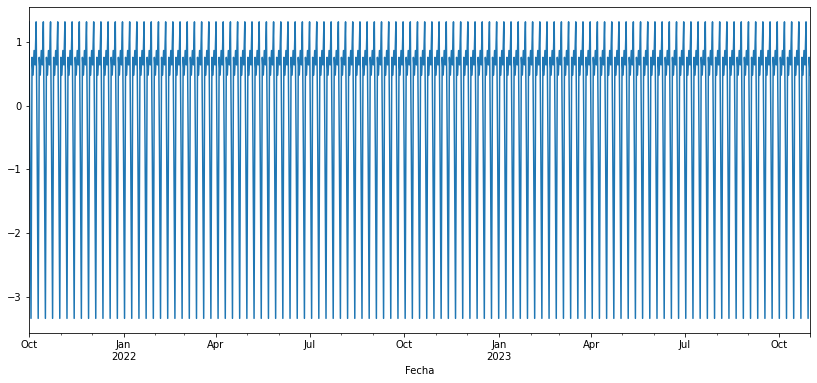

In [61]:
plt.figure( figsize = (14,6))
s_dec_additive.seasonal.plot()
plt.show()


Se visualizan los residuos.

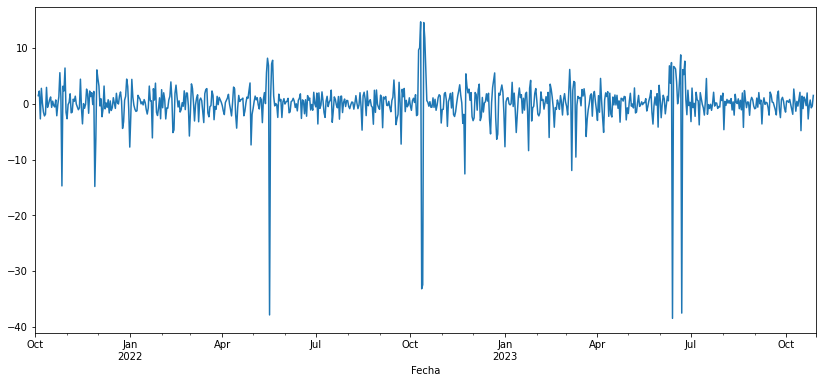

In [68]:
plt.figure( figsize = (14,6))
s_dec_additive.resid.plot()
plt.show()


*COMENTARIO NUEVO 2*

Al hacer la descomposicion de la serie se pueden observar 4 caracteristicas =
- El ciclo
- La tendecia   
- La estacionalidad  ---> la serie no presenta esta caracteristica. Por ello, se ve asi la grafica.
- Movimientoes irregulares ( el error )

Para mayor informacion, tanto la tendencia como la estacionalidad son componentes de NO estacionariedad. ( dicho termino, se analizara en detalle en las proximos clases )

Descomposicion Multiplicativa

In [29]:
import matplotlib

matplotlib.rcParams['figure.figsize']=[12.0,8.0]

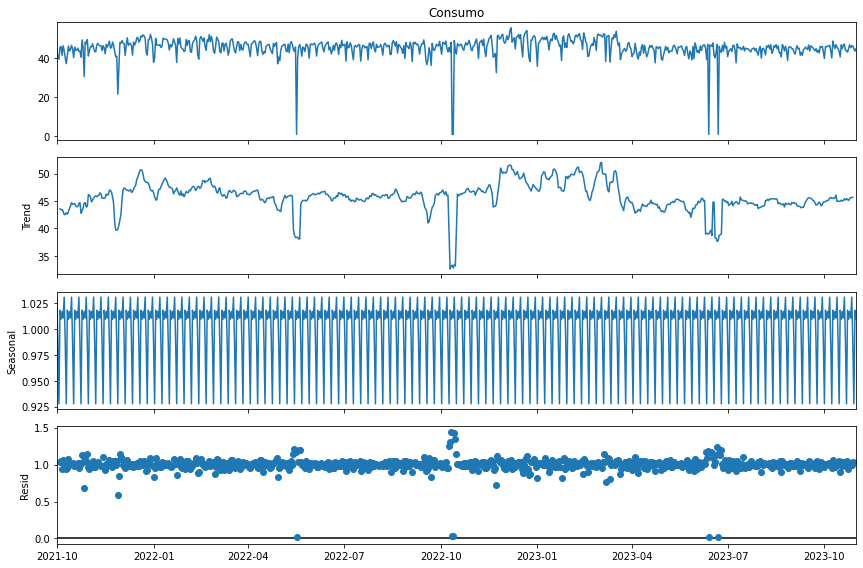

In [30]:
s_dec_multiplicative = seasonal_decompose(df_consumo.Consumo, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

A continuación se visualiza la tendencia

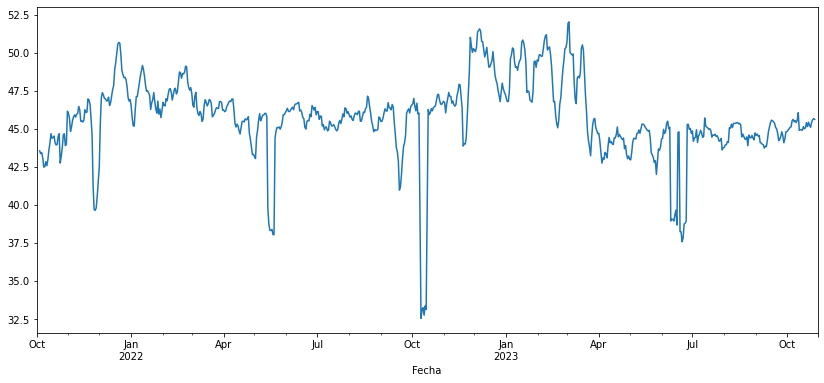

In [63]:
plt.figure( figsize = (14,6))
s_dec_multiplicative.trend.plot()
plt.show()

Se visualiza a continuación la estacionalidad.

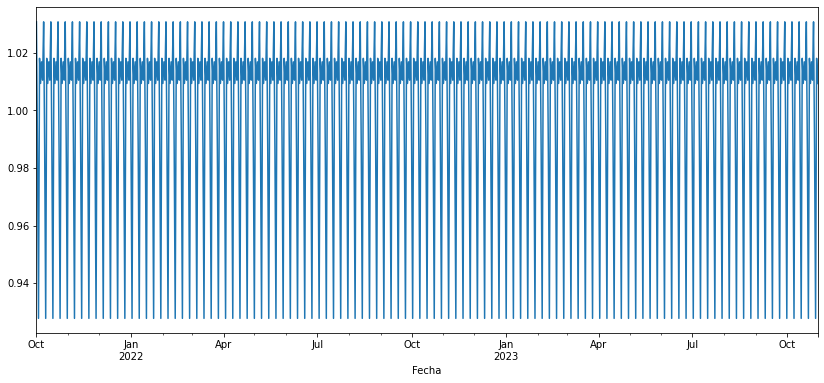

In [62]:
plt.figure( figsize = (14,6))
s_dec_multiplicative.seasonal.plot()
plt.show()

Se visualizan los residuos del modelos.

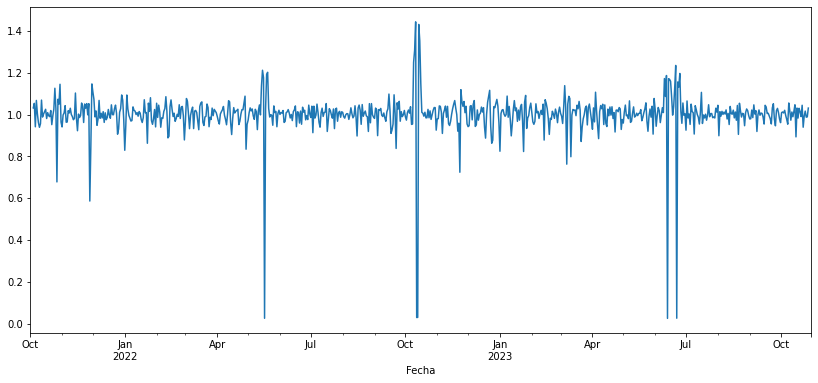

In [69]:
plt.figure( figsize = (14,6))
s_dec_multiplicative.resid.plot()
plt.show()

Representación gráfica de la Función de Autocorrelación

In [31]:
# Modulo para uso exclusivo a partir de aqui
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

In [32]:
matplotlib.rcParams['figure.figsize']=[6.0,4.0]

Grafico ACF del indice Standard & Poor's 500 (SPX)

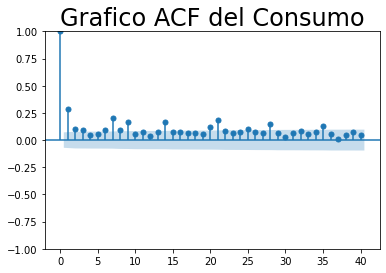

In [33]:
plot_acf(df_consumo.Consumo,lags=40)
plt.title("Grafico ACF del Consumo", size= 24)
plt.show()

*COMENTARIO NUEVO 3*

El grafico es el llamado de autocorrelacion. En el mismo, nos da una primera aproximacion de estacionariedad o no estacionariedad (recuerden que es una primera aproximacion, no definitiva, que luego se testea para confirmar ) .

En este caso, la grafica presenta signos de no estacionarieda. Ya que tiene un decrecimiento lineal que no llega a bajar en el tiempo.

APLICAMOS UNA TRANSFORMACION DE LA SERIE

In [34]:
primera_diffs=df_consumo.Consumo.values[1:]-df_consumo.Consumo.values[:-1]
primera_diffs=np.concatenate([primera_diffs,[0]])

In [35]:
df_consumo['primera_diffs_Consumo']=primera_diffs

In [36]:
df_consumo.head()

,Consumo,primera_diffs_Consumo
Fecha,,
2021-10-01,45.201497,-5.301778
2021-10-02,39.899719,-0.193995
2021-10-03,39.705724,6.071443
2021-10-04,45.777167,0.369969
2021-10-05,46.147136,-4.538013


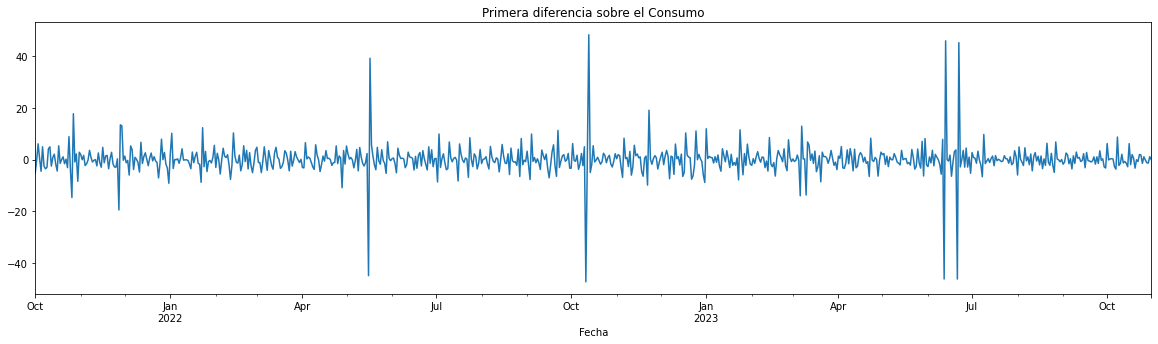

In [37]:
#grafico este indice con las diferencias aplicadas fila a fila
df_consumo.primera_diffs_Consumo.plot(figsize=(20,5), title = "Primera diferencia sobre el Consumo")
plt.show()

*COMENTARIO NUEVO 4*

En este caso, vemos la grafica de la primera diferencia de la serie original. Nos muestra una caracteristia del Ruido blanco ( White noise ).

Caracteristicas generales White noise =

- TIENE REVERSION A LA MEDIA
- VALOR ESPERADO CONSTANTE = 0
- VOLATILIDAD CONSTANTE EN EL TIEMPO



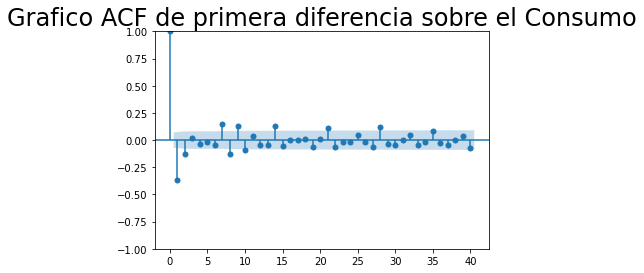

In [38]:
plot_acf(df_consumo.primera_diffs_Consumo,lags=40)
plt.title("Grafico ACF de primera diferencia sobre el Consumo", size= 24)
plt.show()

### Gráfico de Autocovarianza

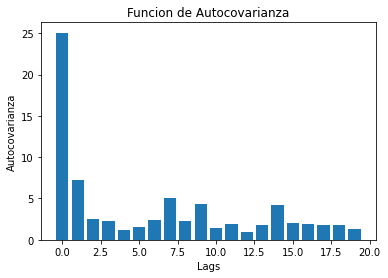

In [70]:
def autocovariance(series, lag):
    n = len(series)
    mean = np.mean(series)
    covar_sum = 0

    for t in range(lag, n):
        covar_sum += (series[t] - mean) * (series[t - lag] - mean)

    return covar_sum / (n - lag)

time_series = df_consumo.Consumo

# Calcular autocovarianza para 20 retrasos (lags)
lags = range(20)

autocovars = [autocovariance(time_series, lag) for lag in lags]

# Graficar la función de autocovarianza
plt.bar(lags, autocovars)
plt.xlabel('Lags')
plt.ylabel('Autocovarianza')
plt.title('Funcion de Autocovarianza')
plt.show()

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

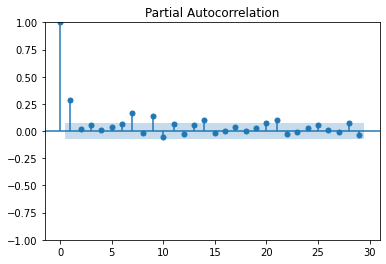

In [75]:
plot_pacf(df_consumo.Consumo);

El consumo se comporta como un random walk, por lo que se modelizará como un AR(1).

## ARIMA

In [77]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

In [78]:
model = sm.tsa.arima.ARIMA(df_consumo.Consumo, order=((1),0,0))
result = model.fit()

In [79]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Consumo   No. Observations:                  761
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2272.070
Date:                Sun, 26 Nov 2023   AIC                           4550.141
Time:                        12:37:51   BIC                           4564.044
Sample:                    10-01-2021   HQIC                          4555.494
                         - 10-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.7220      0.378    121.022      0.000      44.981      46.462
ar.L1          0.2896      0.013     22.638      0.000       0.265       0.315
sigma2        22.9491      0.371     61.799      0.000      22.221      23.677
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             60810.24
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               1.29   Skew:                            -4.88
Prob(H) (two-sided):                  0.05   Kurtosis:                        45.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [80]:
result.arroots

array([3.45300603])

In [81]:
print(f"La raiz REAL del modelo condicionado a un AR(1)  es= {result.arroots} \n vemos que es en modulo mayor a 1. Es decir, es estacionaria ")

La raiz REAL del modelo condicionado a un AR(1)  es= [3.45300603] 
 vemos que es en modulo mayor a 1. Es decir, es estacionaria 


In [82]:
print(f"Los parametros que arroja el modelo son= \n {result.params} ")

Los parametros que arroja el modelo son= 
 const     45.721955
ar.L1      0.289603
sigma2    22.949085
dtype: float64 


In [83]:
print(f"Los criterios de informacion que arroja el modelo son \n -Akaike= {result.aic} \n -Bayesiano= {result.bic} \n -Hannan-Quinn {result.hqic}")

Los criterios de informacion que arroja el modelo son 
 -Akaike= 4550.140500251049 
 -Bayesiano= 4564.044400324634 
 -Hannan-Quinn 4555.494320695793


In [84]:
print(f" La media de los residuos del modelo es=  {result.resid.mean()}")

 La media de los residuos del modelo es=  -9.356383538426297e-05


In [85]:
print(f" La varianza de los residuos del modelo es=  {result.resid.var()}")

 La varianza de los residuos del modelo es=  22.979427226077295


La media de los residuos se encuentra muy cercana a 0, aunque los residuos presentan una gran varianza.

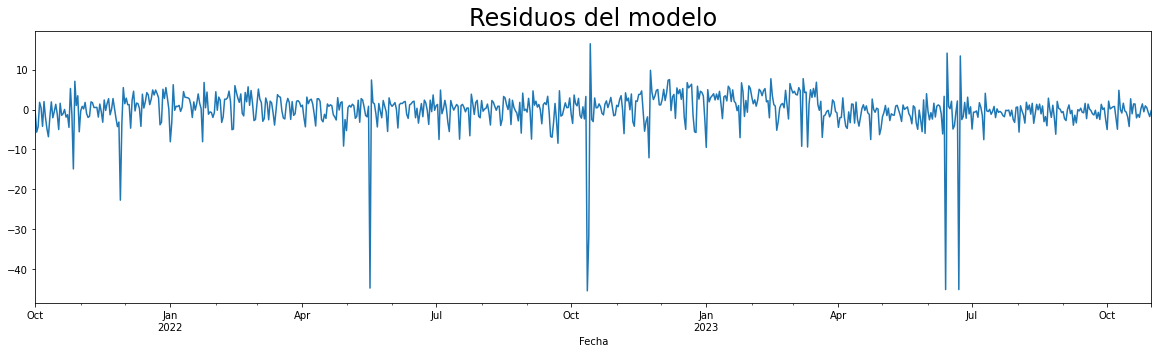

In [86]:
result.resid.plot(figsize=(20,5))
plt.title("Residuos del modelo",size=24)
plt.show()

Se analiza si los residuos se comportan como ruido blanco.

Text(0.5, 1.0, 'Histograma de los residuos del modelo')

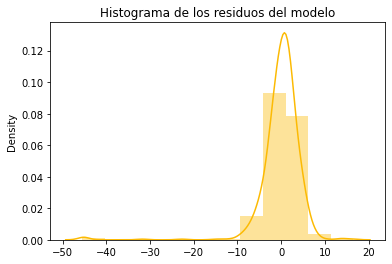

In [87]:
sns.distplot(result.resid,bins=12,color='#fcba03')
plt.title('Histograma de los residuos del modelo')

In [88]:
import scipy.stats
import pylab

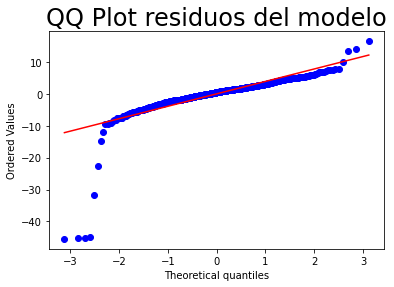

In [89]:
scipy.stats.probplot(result.resid, plot = pylab)
plt.title("QQ Plot residuos del modelo", size = 24)
pylab.show()

En el QQ plot se puede ver la gran asimetría hacia la izquierda que tienen los residuos del modelo. Esto se debe a que en algunos días de la serie no se cargaron combustible y por lo tanto el consumo fue 0. Estos puntos exógenos no pueden ser predichos por el modelo y genera que los residuos sean muy grandes.

### Prueba Ljung-Box

In [90]:
import statsmodels.api as sm

In [91]:
Incorr_residuos_modelo=sm.stats.acorr_ljungbox(result.resid, lags=30)

In [92]:
Incorr_residuos_modelo

,lb_stat,lb_pvalue
1,0.016881,8.966232e-01
2,0.017808,9.911355e-01
3,2.521184,4.714748e-01
4,2.625562,6.223017e-01
5,3.090516,6.860332e-01
6,3.771938,7.075068e-01
7,27.738013,2.452688e-04
8,27.778234,5.183057e-04
9,45.783641,6.605323e-07
10,45.857257,1.522205e-06


Text(0, 0.5, 'P-valores ')

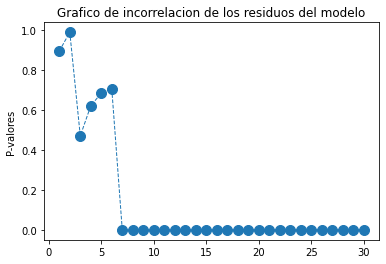

In [93]:
plt.plot(Incorr_residuos_modelo.lb_pvalue, marker='o', markersize=10, linestyle='--', linewidth=1)
plt.title("Grafico de incorrelacion de los residuos del modelo")
plt.ylabel("P-valores ")

Presentan correlación los residuos??